# How to evaluate functions in sympy

Sympy knows functions. After 

`from sympy import *` 

which is usually ok in notebooks, i.e. `sin(x)`,  `cos(x)`, `exp(x)` or `ln(x)` are known functions.

Sympy also knows undefined functions, like

`f = Function('f')`

or

`g = Function('g')(x)`

Undefined functions can be used in differerential equations for example. 

But sometimes it is useful to define a function from a given expression, like

$$
  f(x) = a\,x^2
$$

In this cases it is often recommended to use expressions:

`
a,x = symbols('a,x')
expr = a*x**2
`

Now, it is possible, to simulate the function $f(x)=a\,x^2$ using this expression, i.e.:

`
expr.subs(x,2) # to calculate f(2)
expr.diff(x)   # to calculate f'(x)
`

If you realy want to have a function, then it is often recommended to use `def` or `lambda` for this.

Let's try some examples:

In [1]:
from sympy import *
init_printing()

In [2]:
# some examples for the sin-function:
x = Symbol('x')
[sin(x), sin(0), sin(pi/2), sin(pi)]

In [3]:
# Undefined functions:
f = Function('f')
f

f

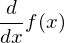

In [4]:
f(x).diff()

In [5]:
g = Function('g')(x)
g

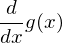

In [6]:
g.diff()

Now lets try to use the function

$$
  f(x) = a\,x^2
$$

Use expression to simulate the function:

In [7]:
# Define symbols
a,x = symbols('a,x')

# define expression
expr = a*x**2

# output expression
expr

In [8]:
# Evaluate f(2)
expr.subs(x,2)

In [9]:
# Determine the expression that belongs to f'(x)
expr_1 = expr.diff(x)
expr_1

In [10]:
# Evaluate f'(1)
expr_1.subs(x,1)

If we want to have a 'real' function, we could try to use `def`:

In [11]:
def f(x):
    """
    define function 
       a: global variable
       x: bound to the function
    """
    return a*x**2

In [12]:
# Evaluate f(2)
f(2)

This seems to be ok, but it does not behave the same way as our previously defined expression does:

If, for example, at some point in the notebook, `a` is redefined, we get:

In [13]:
a = 5


# the global variable a and the symbol a in expr are different:
expr.subs(x,2)

In [14]:
# But here, a is the global variable of value 5
f(2)

This happens, because the function `f` uses the global variable `a`, which was redefined to be `a=5`.

But `expr` is defined with a Symbol `a` and this Symbol is not altered by changeing the global variable `a`.

If this is an unexpected behaviour, we could try to define the symbol `a` inside the function `f`:

In [15]:
def f(x):
    """
    define function
       a: local variable, always a Symbol
       x: bound to the function
    """
    a = Symbol('a')
    return a*x**2

In [16]:
a

In [17]:
f(2)

How to define the derivative of `f`? The most straightforward way seems to be:

In [18]:
def f_1(x):
    """
    define f'(x)
    for that, differentiate the expression f(x) wrt x
    and return the result.
    """
    return f(x).diff(x)

f_1(x)

This seems to work, but it fails:

In [19]:
# This throws an ValueError
# The reason is, f_1 tries to diff f(2) wrt 2 
f_1(2)

ValueError: 
Can't calculate 1st derivative wrt 2.

This means, we must be careful to define the derivative of the function `f`:

In [20]:
def f_1(x):
    """
    define f'(x)
    for that, define a local variable v as Symbol
    and determine f'(v) wrt v.
    Substitute the symbol v by the bound variable x
    and return the result.
    """
    v = Symbol('v')
    return f(v).diff(v).subs(v,x)

In [21]:
f_1(x)

In [22]:
f_1(2)

Now assume, the value of the free symbol `a` has to be determined to satisfy 

\begin{align*}
f(x) &= a\,x^2 \\
f(2) &= 8
\end{align*}

Using `expr` we might write

In [23]:
eq = Eq(expr.subs(x,2),8)
eq

This gives the solution

In [24]:
sol = solve(eq)
sol

With this, we can redefine `expr` as

In [25]:
# We need to redefine a as Symbol
a = Symbol('a')
expr = expr.subs(a,sol[0])
expr

In [26]:
# Test:
expr.subs(x,2)

Using `f(x)` this would read:

In [27]:
eq = Eq(f(2),8)
eq

In [28]:
sol = solve(eq)
sol

But now, $f$ needs to be rewritten in order to hold $f(x) = 2\,x^2$. 

In [29]:
def f(x):
    return 2*x**2

In [30]:
f(2)